<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/logisticregression_postugesbankingdataset_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/logisticregressiondataset/new_test.csv')

In [5]:
np.random.seed(42)  # For reproducibility
df['termdeposit'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])  # 70% No, 30% Yes

# Confirm new target distribution
df['termdeposit'].value_counts(normalize=True)

,proportion
termdeposit,
0,0.709881
1,0.290119


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

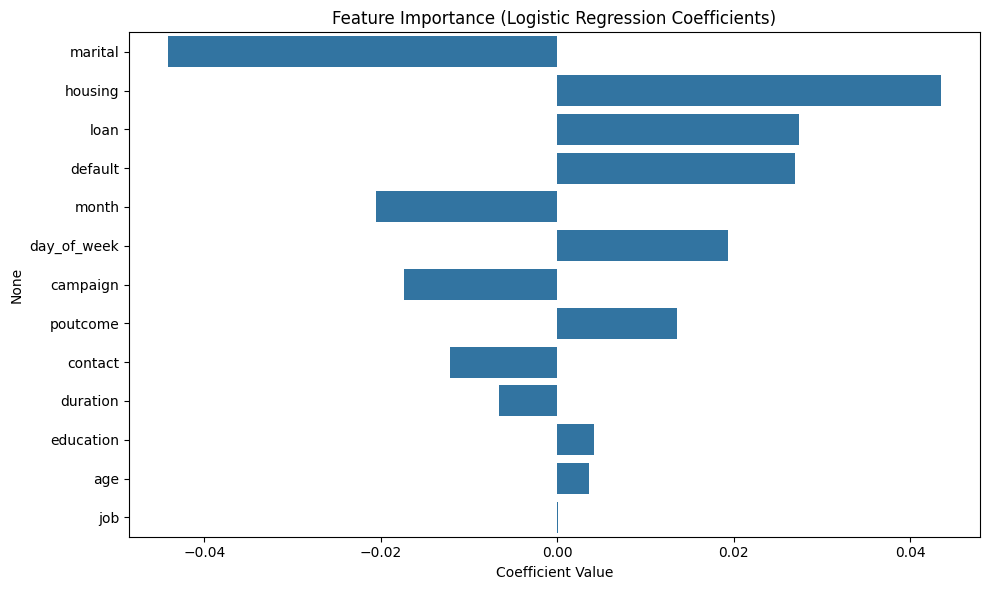

('              precision    recall  f1-score   support\n\n           0       0.72      1.00      0.84      1191\n           1       0.00      0.00      0.00       457\n\n    accuracy                           0.72      1648\n   macro avg       0.36      0.50      0.42      1648\nweighted avg       0.52      0.72      0.61      1648\n',
 0.7226941747572816,
 0.0,
 0.0,
 0.0,
 np.float64(0.45728632137089437))

In [8]:
X_new = df.drop('termdeposit', axis=1)
y_new = df['termdeposit']
scaler=StandardScaler()
# Standardize the features
X_new_scaled = scaler.fit_transform(X_new)

# Train-test split
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_new_scaled, y_new, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg_new = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg_new.fit(Xn_train, yn_train)

# Make predictions
yn_pred = log_reg_new.predict(Xn_test)
yn_proba = log_reg_new.predict_proba(Xn_test)[:, 1]

# Evaluate the model
acc = accuracy_score(yn_test, yn_pred)
prec = precision_score(yn_test, yn_pred)
rec = recall_score(yn_test, yn_pred)
f1 = f1_score(yn_test, yn_pred)
roc_auc = roc_auc_score(yn_test, yn_proba)
class_report = classification_report(yn_test, yn_pred)

# Visualize feature importance
importance = pd.Series(log_reg_new.coef_[0], index=X_new.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

class_report, acc, prec, rec, f1, roc_auc

# Logistic Regression Results on Synthetic termdeposit Target:
Accuracy: 72.27%

Precision (for 'Yes'): 0.00

Recall (for 'Yes'): 0.00

F1-score (for 'Yes'): 0.00

ROC-AUC: 0.4572